https://www.federalreserve.gov/pubs/feds/2006/200628/200628pap.pdf

# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [ ]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [ ]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [ ]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
data2.shape

(10528, 24)

In [ ]:
data2.head()

,Date,BETA0,BETA1,BETA2,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


# Data overview

## Plotting variables 

In [ ]:
plot_data =data2

# Rename SVENY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[5:] if col.startswith('SVENY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)



Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt

# Histogram plotting function, you can adjust the bins

def plot_histogram(column_name, bins=30):
    if column_name not in plot_data.columns:
        print(f"Column '{column_name}' not found in data.")
        return

    plt.figure(figsize=(6, 4))
    plt.hist(plot_data[column_name].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


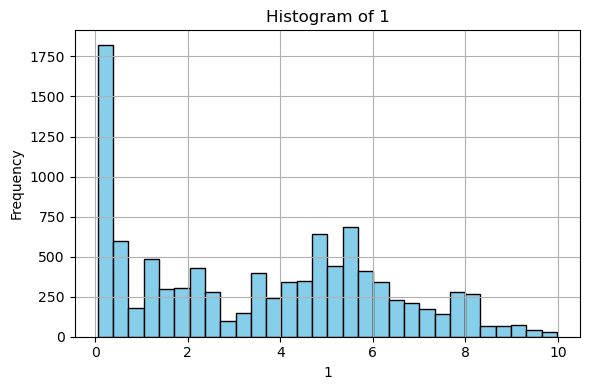

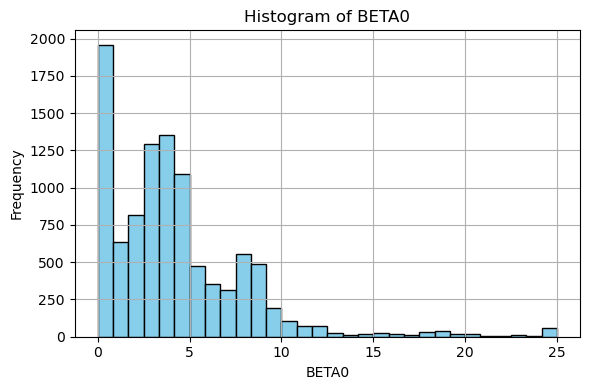

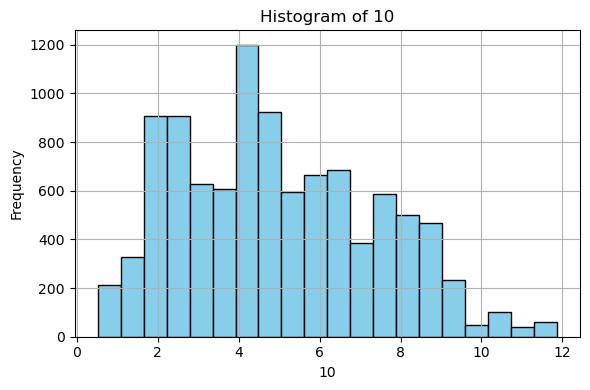

In [ ]:
plot_histogram('1')         # Histogram for maturity 1
plot_histogram('BETA0')     # Histogram for BETA0
plot_histogram('10', bins=20)  # Histogram for maturity 10 with 20 bins

## Plotting yield curve for one maturity

In [ ]:
plot_data.head(5)

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


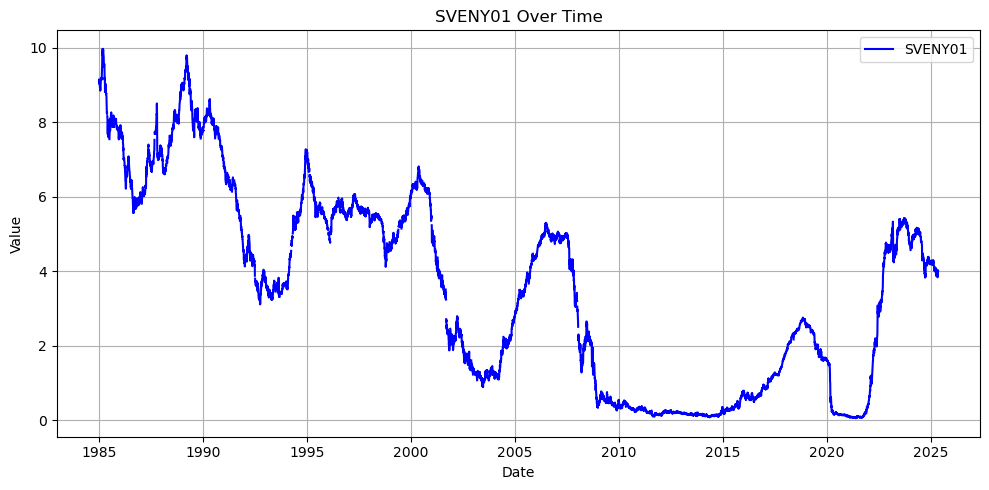

In [ ]:
# Plot column '1' against Date
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Date'], plot_data['1'], label='SVENY01', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVENY01 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## 3d plot of yield curve

/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_41547/2336497114.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


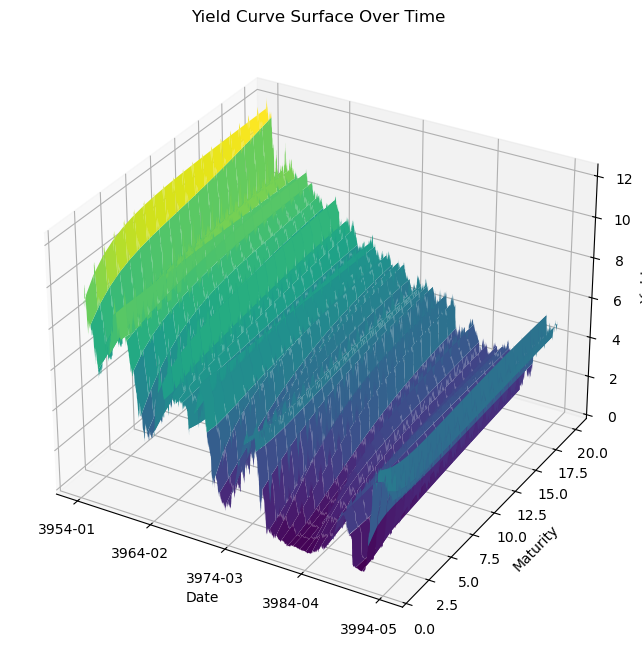

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Ensure Date is in numeric format for plotting (convert to ordinal)
X = plot_data['Date'].map(pd.Timestamp.toordinal).values  # shape: (n_dates,)

# Get the maturity columns, assume they are all digit strings
maturity_cols = sorted([col for col in plot_data.columns if col.isdigit()], key=lambda x: int(x))
Y = np.array([int(m) for m in maturity_cols])  # shape: (n_maturities,)

# Get Z values (yield values): shape should be (n_dates, n_maturities)
Z = plot_data[maturity_cols].values  # shape: (n_dates, n_maturities)

# Create meshgrid for Date (X) and Maturity (Y)
X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='ij')  # X: dates, Y: maturities

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis')

# Format axes
ax.set_xlabel('Date')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')
ax.set_title('Yield Curve Surface Over Time')

# Optional: Format date ticks
from matplotlib.dates import num2date
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_xticklabels([num2date(t).strftime('%Y-%m') for t in np.linspace(X.min(), X.max(), 5)])

plt.tight_layout()
plt.show()

## Preliminary attempt at encoding

Note: Removing all NaN's and including beta's in the encoder

I.e.: this is only to compare and detect weaknessses in the model preliminary to actual fitting

In [ ]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.6427 - val_loss: 0.0965
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.1440 - val_loss: 0.0582
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 0.0548 - val_loss: 0.0356
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.0414 - val_loss: 0.0283
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.0373 - val_loss: 0.0247
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0138 - val_loss: 0.0218
Epoch 7/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.0087 - val_loss: 0.0209
Epoch 8/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0085 - val_loss: 0.0182
Epoch 9/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.0079 - val_loss: 0.0167
Epoch 10/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.0075 - val_loss: 0.0135
Epoch 11/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0069 - val_loss: 0.0131
Epoch 12/50
284/284 ━━━━━━━━━━

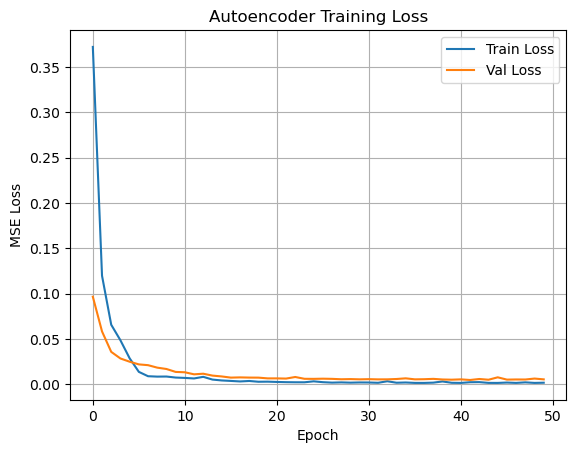

In [ ]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENY01 to SVENY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

# PCA constructing Betas

## How many components

In [ ]:
data_pca = data2.drop(columns=['BETA0', 'BETA1', 'BETA2', 'BETA3'], errors='ignore')

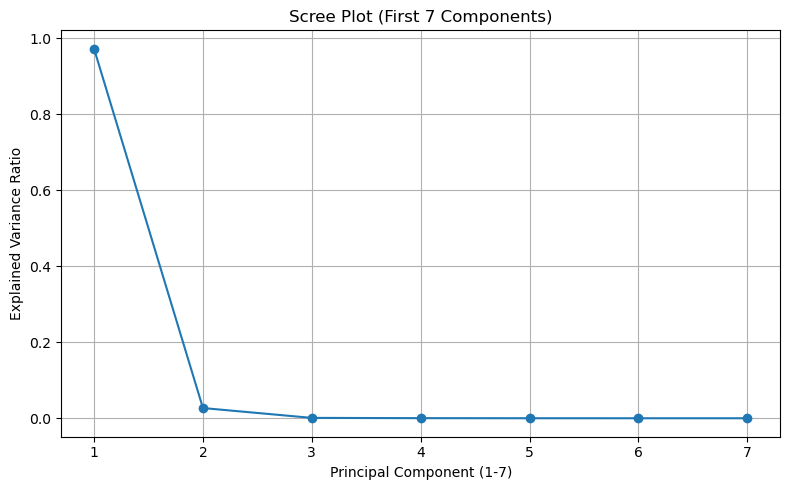

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select only numeric columns and drop NaNs
X = data_pca.select_dtypes(include=[np.number]).dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA and limit to 7 components
pca = PCA(n_components=7)
pca.fit(X_scaled)

# 4. Explained variance for first 7 components
explained_variance = pca.explained_variance_ratio_

# 5. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component (1-7)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 7 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



## PCA with 3 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 3)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]]


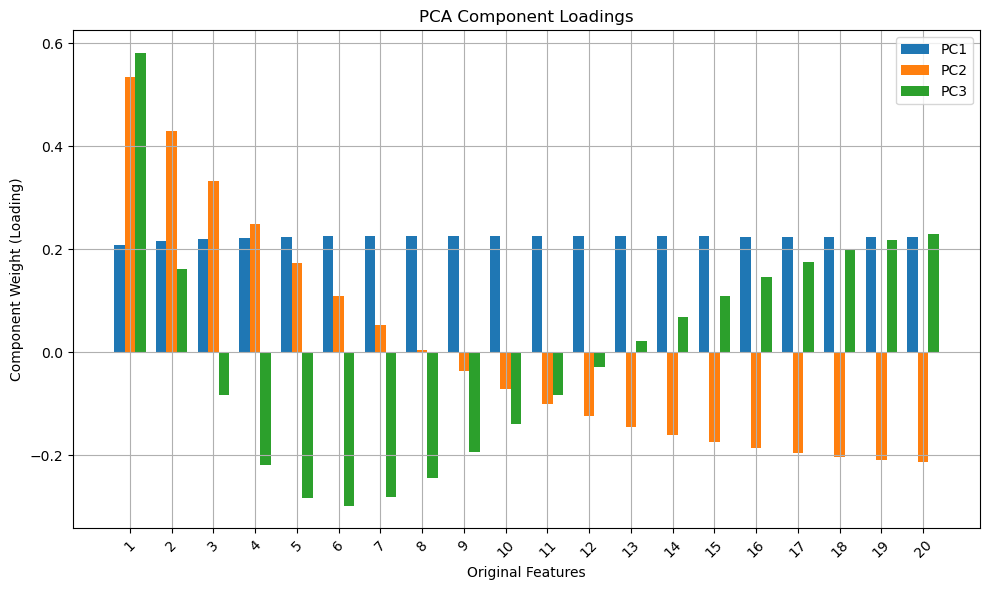

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


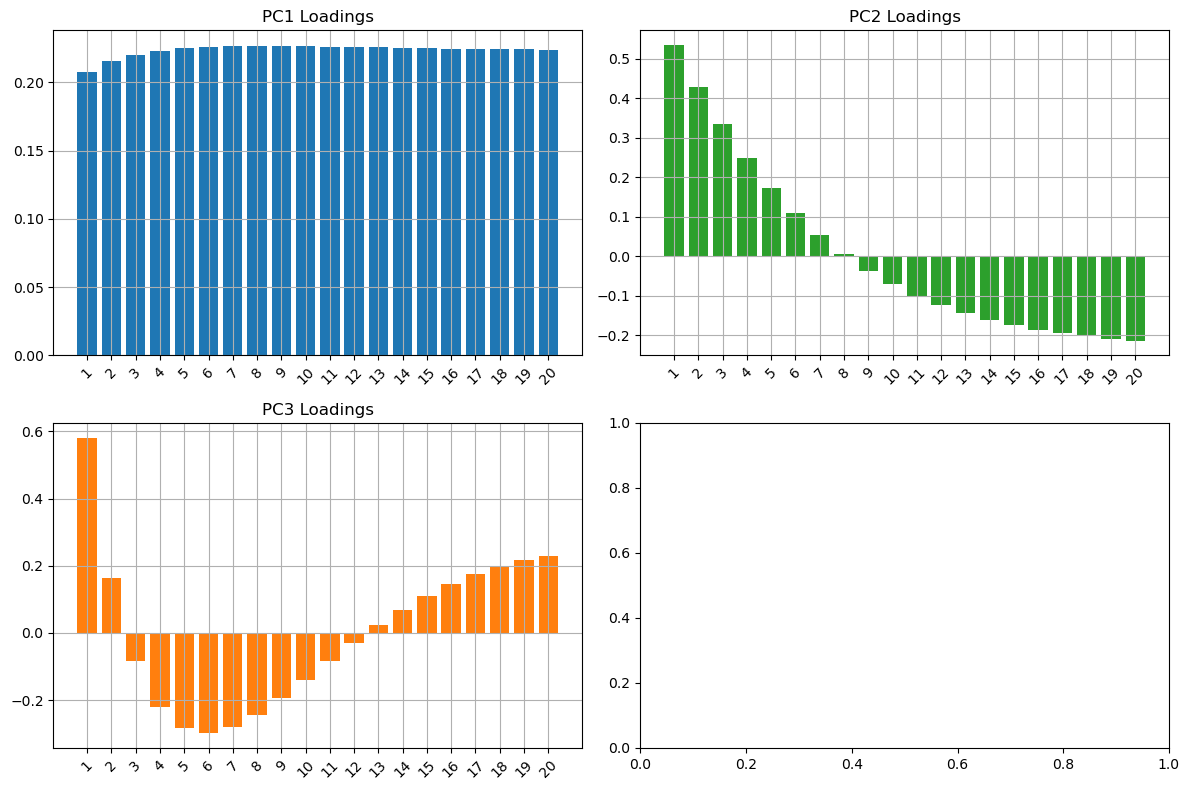

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## PCA with 4 components

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 4)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04 2.51365424e-04]


In [ ]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]
 [-0.33847372  0.09971218  0.26652469  0.2714737   0.19343685  0.08254604
  -0.03070241 -0.12877415 -0.20257298 -0.24838    -0.26580128 -0.25640695
  -0.22279283 -0.16803953 -0.09531669 -0.00768995  0.0920016   0.20119539
   0

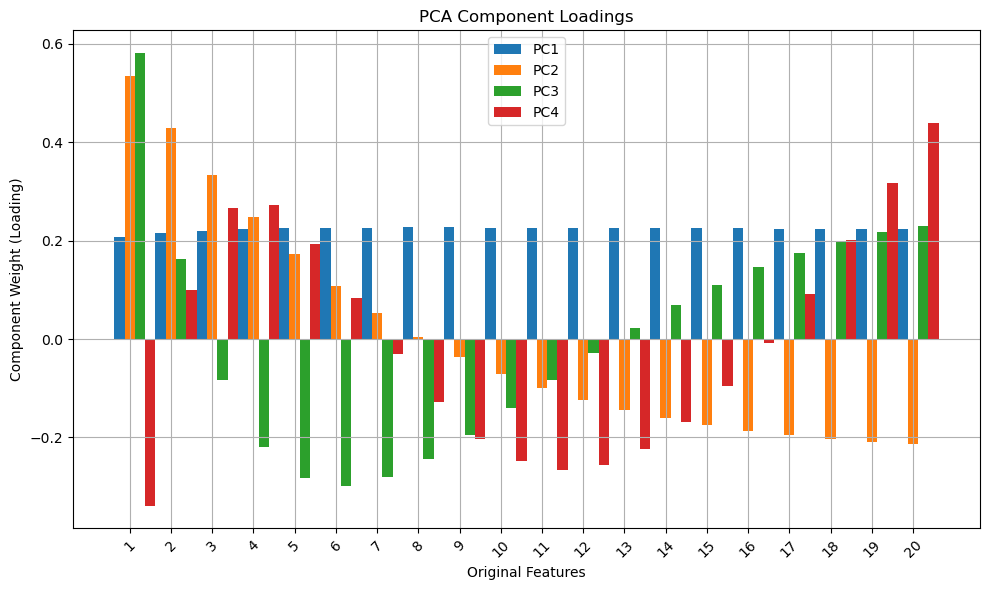

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


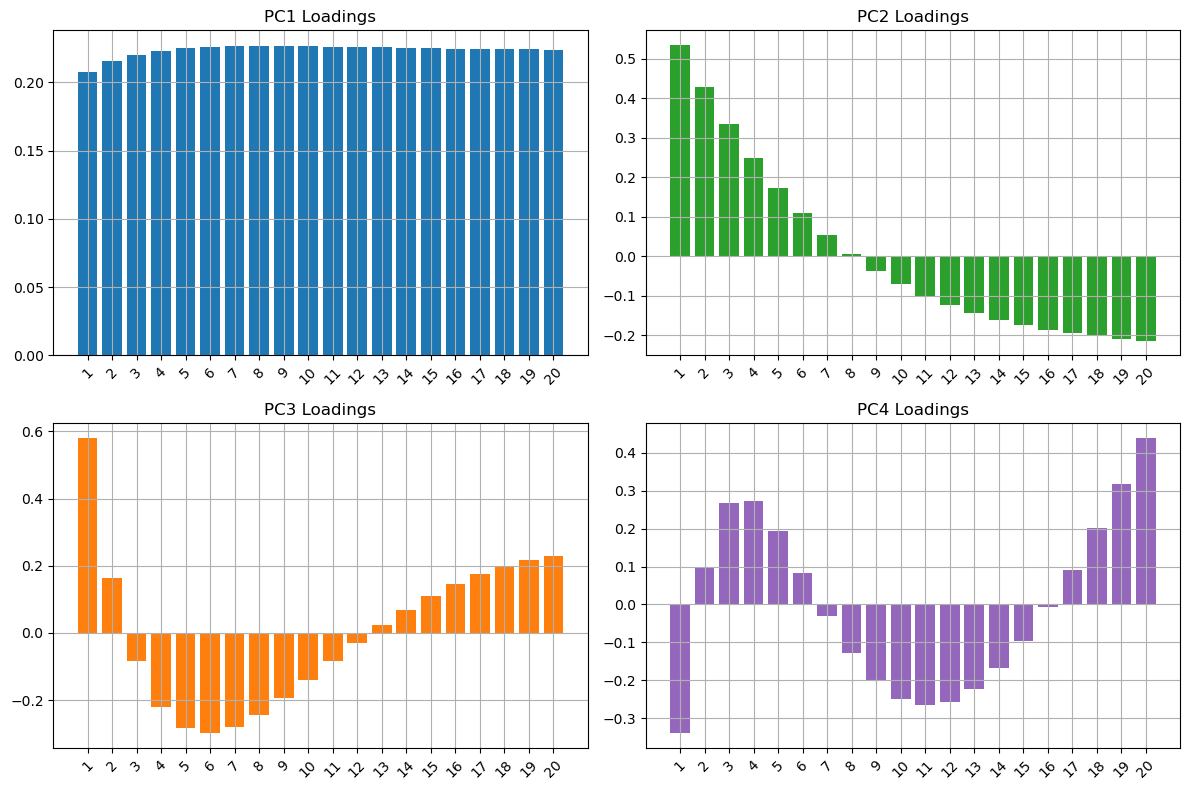

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Plot PC4 (bottom left)
axs[1, 1].bar(feature_names, components_df.loc['PC4'], color='tab:purple')
axs[1, 1].set_title('PC4 Loadings')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Remove columns that start with "BETA"
data_coder = data2.loc[:, ~data2.columns.str.startswith('BETA')]

data_coder.head()


,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,11.4652,11.5418,11.5951,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,11.4017,11.4809,11.5400,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,11.4336,11.5134,11.5736,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,11.2961,11.3727,11.4319,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,11.2496,11.3231,11.3794,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 2: Separate 'Date' column
dates = data_coder['Date']
features = data_coder.drop(columns='Date')

# Step 3: Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Step 4: Create normalized DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)
normalized_df['Date'] = dates.values

# Step 5: Reorder columns to have 'Date' first
normalized_df = normalized_df[['Date'] + [col for col in normalized_df.columns if col != 'Date']]

# Step 6: Preview
normalized_df.head()


,Date,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,SVENY07,SVENY08,SVENY09,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
0,1985-01-02,0.912519,0.937690,0.950695,0.959074,0.965036,0.969597,0.973194,0.975994,0.978064,...,0.980216,0.980382,0.979993,0.979143,0.976519,0.973326,0.969787,0.965592,0.960325,0.949114
1,1985-01-03,0.917104,0.939492,0.949647,0.955824,0.960371,0.964212,0.967639,0.970658,0.973223,...,0.976767,0.977702,0.978097,0.977992,0.976082,0.973558,0.970643,0.967007,0.962251,0.951498
2,1985-01-04,0.914968,0.940839,0.952180,0.958664,0.963214,0.967014,0.970429,0.973506,0.976175,...,0.980057,0.981189,0.981781,0.981874,0.980144,0.977786,0.975028,0.971527,0.966901,0.956229
3,1985-01-07,0.911118,0.935168,0.944509,0.949305,0.952601,0.955534,0.958400,0.961179,0.963727,...,0.967676,0.968935,0.969686,0.969951,0.968413,0.966260,0.963683,0.960378,0.955933,0.945509
4,1985-01-08,0.909817,0.932834,0.941630,0.946073,0.949080,0.951733,0.954332,0.956833,0.959114,...,0.962546,0.963567,0.964097,0.964150,0.962440,0.960122,0.957417,0.953980,0.949437,0.938957


# S&P 500 

## Data loading

In [ ]:
data2.head()

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


In [ ]:
import pandas as pd

# Skip the first 9 rows
SP_500 = pd.read_csv('../Final-Project-AppML/S&P500_data.csv')

SP_500['Date'] = pd.to_datetime(SP_500['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Show the first 5 rows of the resulting dataframe
SP_500.head(5)



,Date,Close/Last,Open,High,Low
0,2025-05-20,5940.46,5944.66,5953.06,5909.26
1,2025-05-19,5963.60,5902.88,5968.61,5895.69
2,2025-05-16,5958.38,5929.09,5958.62,5907.36
3,2025-05-15,5916.93,5869.82,5924.21,5865.16
4,2025-05-14,5892.58,5896.74,5906.55,5872.11


In [ ]:
import pandas as pd

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

SP_500_historic.head(5)


,Date,Close,High,Low,Open,Volume
0,1985-01-02,165.369995,167.199997,165.190002,167.199997,67820000
1,1985-01-03,164.570007,166.110001,164.380005,165.369995,88880000
2,1985-01-04,163.679993,164.550003,163.360001,164.550003,77480000
3,1985-01-07,164.240005,164.710007,163.679993,163.679993,86190000
4,1985-01-08,163.990005,164.589996,163.910004,164.240005,92110000


In [ ]:
import pandas as pd

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Show the first 5 rows of the resulting dataframe
fed_interest.head(5)

,Date,FEDFUNDS,Notes,Rate Change (bps),Target Rate (%)
0,1991-01-01,6.91,NaN,NaN,NaN
1,1991-01-02,6.91,NaN,NaN,NaN
2,1991-01-03,6.91,NaN,NaN,NaN
3,1991-01-04,6.91,NaN,NaN,NaN
4,1991-01-05,6.91,NaN,NaN,NaN


## Plotting data

In [ ]:
SP_500_historic

,Date,Close,High,Low,Open,Volume
0,1985-01-02,165.369995,167.199997,165.190002,167.199997,67820000
1,1985-01-03,164.570007,166.110001,164.380005,165.369995,88880000
2,1985-01-04,163.679993,164.550003,163.360001,164.550003,77480000
3,1985-01-07,164.240005,164.710007,163.679993,163.679993,86190000
4,1985-01-08,163.990005,164.589996,163.910004,164.240005,92110000
...,...,...,...,...,...,...
10173,2025-05-19,5963.600098,5968.609863,5895.689941,5902.879883,4144010000
10174,2025-05-20,5940.459961,5953.060059,5909.259766,5944.660156,4416850000
10175,2025-05-21,5844.609863,5938.370117,5830.910156,5910.180176,5254250000
10176,2025-05-22,5842.009766,5878.080078,5825.819824,5841.259766,5157050000


In [ ]:
import matplotlib.pyplot as plt

def plot_all_columns_time_series(data, date_col='Date'):
    """
    Plots each column in `data` (excluding the date column) as a time series line plot.

    Parameters:
    - data: pandas DataFrame with a datetime column and numeric columns to plot.
    - date_col: Name of the column containing dates (default: 'Date')
    """
    if date_col not in data.columns:
        print(f"Date column '{date_col}' not found.")
        return

    # Ensure date column is datetime
    data = data.copy()
    data[date_col] = pd.to_datetime(data[date_col])

    # Set date as index
    data = data.set_index(date_col)

    # Plot all columns
    plt.figure(figsize=(12, 6))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)

    plt.title('Time Series of All Columns')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


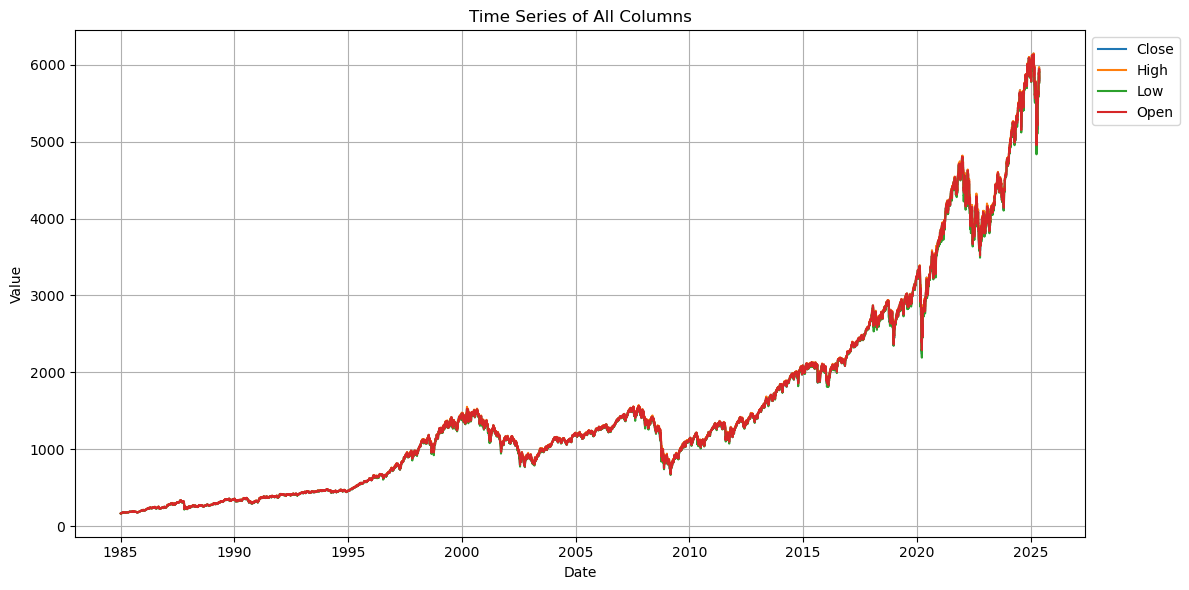

In [ ]:
plot_all_columns_time_series(SP_500_historic.drop(columns='Volume'))


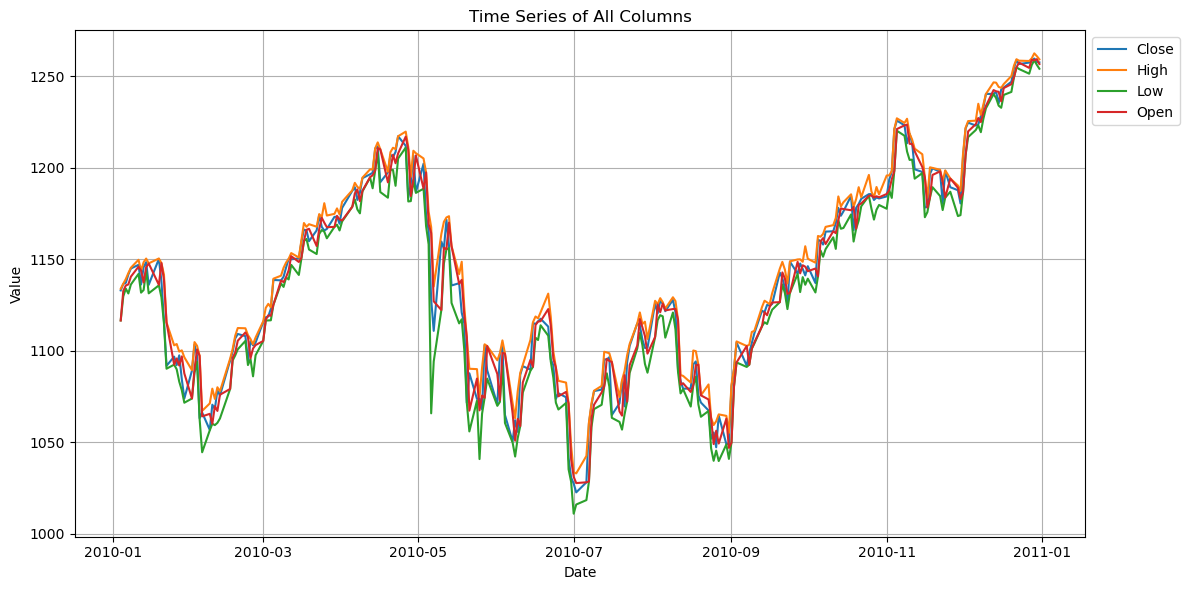

In [ ]:
# Ensure 'Date' is in datetime format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# Filter for date range 2010-01-01 to 2015-12-31
subset = SP_500_historic[
    (SP_500_historic['Date'] >= '2010-01-01') &
    (SP_500_historic['Date'] <= '2010-12-31')
]

# Drop 'Volume' and plot
plot_all_columns_time_series(subset.drop(columns='Volume'))


## Merching data

In [ ]:
# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

data_w_SP.head()


,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,20,Close,High,Low,Open,Volume,FEDFUNDS,Notes,Rate Change (bps),Target Rate (%)
0,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.7501,165.369995,167.199997,165.190002,167.199997,67820000.0,NaN,NaN,NaN,NaN
1,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.7772,164.570007,166.110001,164.380005,165.369995,88880000.0,NaN,NaN,NaN,NaN
2,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.8310,163.679993,164.550003,163.360001,164.550003,77480000.0,NaN,NaN,NaN,NaN
3,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.7091,164.240005,164.710007,163.679993,163.679993,86190000.0,NaN,NaN,NaN,NaN
4,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.6346,163.990005,164.589996,163.910004,164.240005,92110000.0,NaN,NaN,NaN,NaN


## Filtering 

In [ ]:
# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type

# Show the result
data_w_SP.head()


,Date,1,2,3,4,5,6,7,8,9,...,17,18,19,20,Close,High,Low,Open,Volume,FEDFUNDS
1503,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.639320,8.631860,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91
1504,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.509597,8.505267,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91
1505,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.523138,8.521300,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91
1506,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.537293,8.536204,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91
1507,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.586105,8.585315,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91


In [ ]:
data_w_SP.shape

(8565, 27)

In [ ]:
num_rows_with_na = data_w_SP.isna().any(axis=1).sum()
print(num_rows_with_na)

12


## Making a XGboost models

### Predicting with XGboost with time series

#### Baseline model

In [ ]:
data_w_SP.head()

,Date,1,2,3,4,5,6,7,8,9,...,17,18,19,20,Close,High,Low,Open,Volume,FEDFUNDS
1503,1991-01-09,6.841287,7.133531,7.389677,7.613145,7.807043,7.974199,8.117182,8.238325,8.339752,...,8.639320,8.631860,8.617656,8.597437,311.489990,320.730011,310.929993,314.899994,191100000.0,6.91
1504,1991-01-10,6.799324,7.089104,7.339749,7.555624,7.740626,7.898230,8.031535,8.143304,8.236000,...,8.509597,8.505267,8.495562,8.481158,314.529999,314.769989,311.510010,311.510010,124510000.0,6.91
1505,1991-01-11,6.773037,7.085764,7.351627,7.576813,7.766714,7.926027,8.058841,8.168714,8.258740,...,8.523138,8.521300,8.514983,8.504820,315.230011,315.239990,313.589996,314.529999,123050000.0,6.91
1506,1991-01-14,6.777678,7.110425,7.385916,7.613962,7.802602,7.958424,8.086828,8.192242,8.278296,...,8.537293,8.536204,8.530366,8.520263,312.489990,315.230011,309.350006,315.230011,120830000.0,6.91
1507,1991-01-15,6.752939,7.099241,7.371627,7.591270,7.772313,7.924163,8.053062,8.163160,8.257241,...,8.586105,8.585315,8.577150,8.562148,313.730011,313.730011,311.839996,312.489990,110000000.0,6.91


In [ ]:
# Example: use data before a date for training, after that date for testing

split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'Close'

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]

X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]


In [ ]:
def create_lags(df, target_col, lags=[1,2,3]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df

train_data = create_lags(train_data, target)
test_data = create_lags(test_data, target)

# Drop NA rows caused by shifting lags
train_data = train_data.dropna()
test_data = test_data.dropna()

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]
X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]


In [ ]:
def add_date_features(df):
    df = df.copy()
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['weekday'] = df['Date'].dt.weekday
    df['dayofyear'] = df['Date'].dt.dayofyear
    return df

train_data = add_date_features(train_data)
test_data = add_date_features(test_data)

X_train = train_data.drop(columns=[target, 'Date'])
X_test = test_data.drop(columns=[target, 'Date'])


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred)

mean_abs_actual = abs(Y_test).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 115.2876
Relative MAE: 0.0201
Time used by XGBoost: 154.0 ms


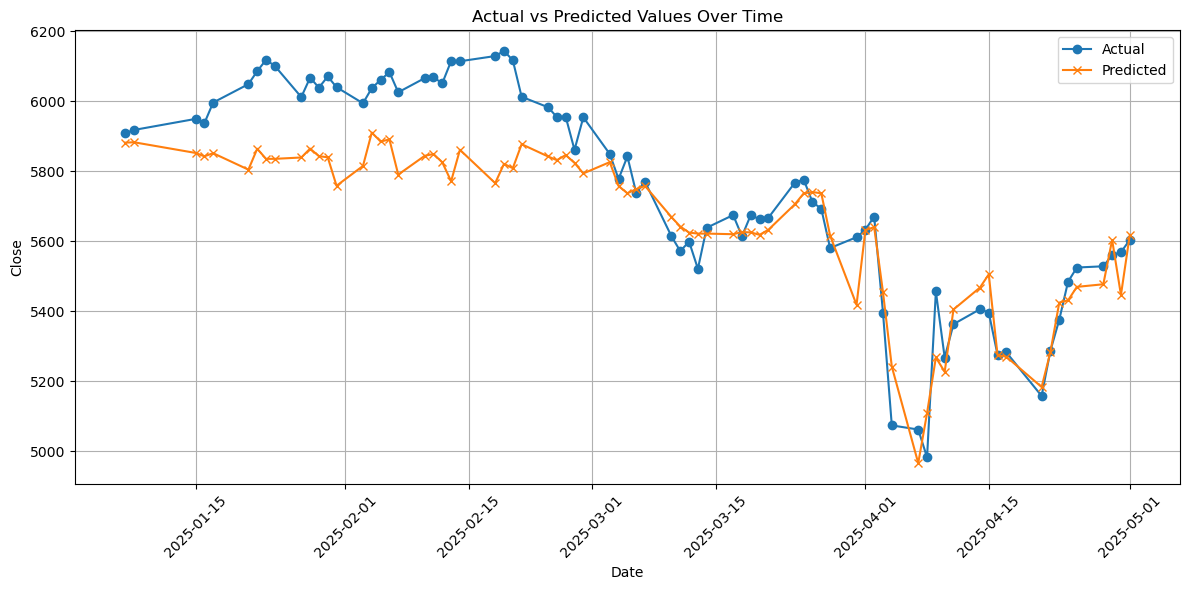

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')  # or your target variable name
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # rotate date labels for readability
plt.tight_layout()       # adjust layout to prevent cutoff
plt.show()



#### Feature importance

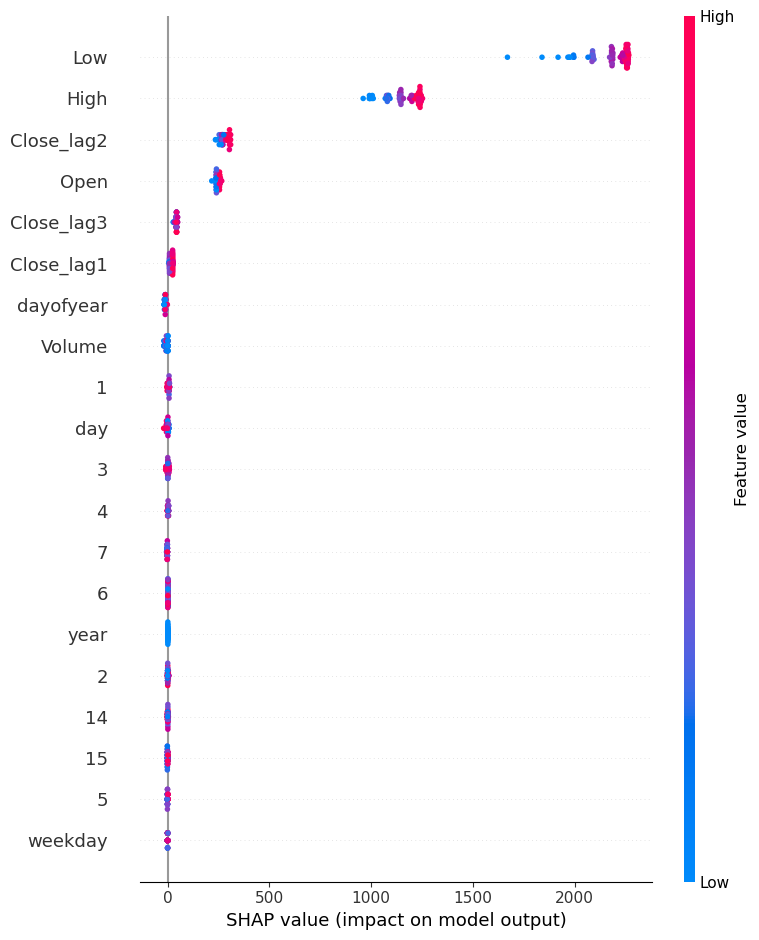

In [ ]:
import shap

# Create a SHAP explainer for your XGBoost model
explainer = shap.Explainer(xgb_model)

# Calculate SHAP values for your test set
shap_values = explainer(X_test)

# Summary plot (shows feature importance and effect)
shap.summary_plot(shap_values, X_test)


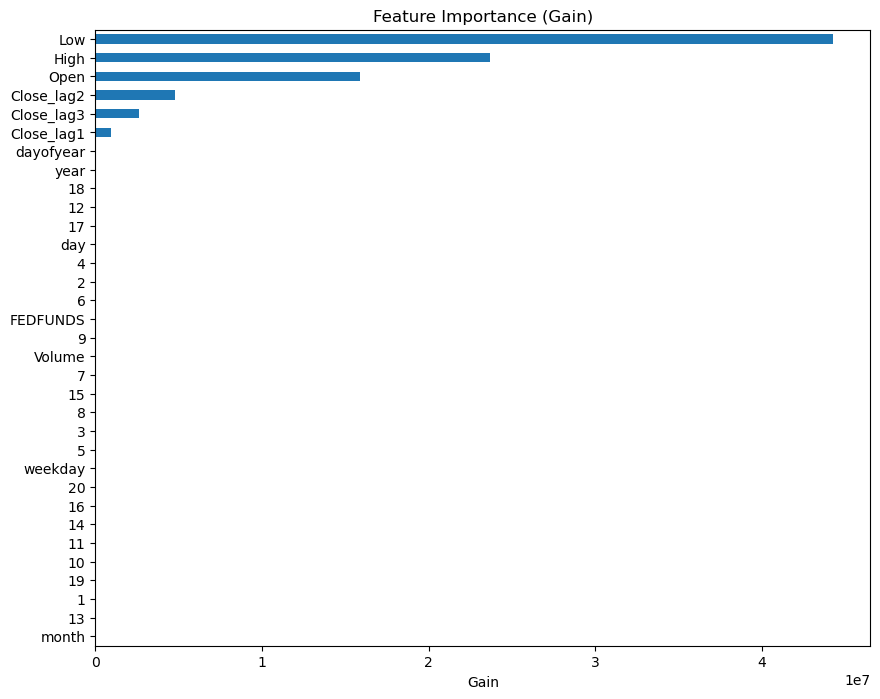

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance scores by 'gain'
importance = xgb_model.get_score(importance_type='gain')

# Convert to pandas Series for easier plotting and sorting
import pandas as pd
importance_series = pd.Series(importance).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importance_series.plot(kind='barh')
plt.xlabel('Gain')
plt.title('Feature Importance (Gain)')
plt.show()


#### Only predicting on ZCB data but with lags

In [ ]:
data_ZCB = data_w_SP.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [ ]:
# Example: use data before a date for training, after that date for testing

split_date = pd.Timestamp('2025-01-01')

train_data = data_ZCB[data_ZCB['Date'] < split_date]
test_data = data_ZCB[data_ZCB['Date'] >= split_date]

target = 'Close'

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]

X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]


In [ ]:
def create_lags(df, target_col, lags=[1,2,3]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df

train_data = create_lags(train_data, target)
test_data = create_lags(test_data, target)

# Drop NA rows caused by shifting lags
train_data = train_data.dropna()
test_data = test_data.dropna()

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]
X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred)

mean_abs_actual = abs(Y_test).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 115.2876
Relative MAE: 0.0201
Time used by XGBoost: 86.8 ms


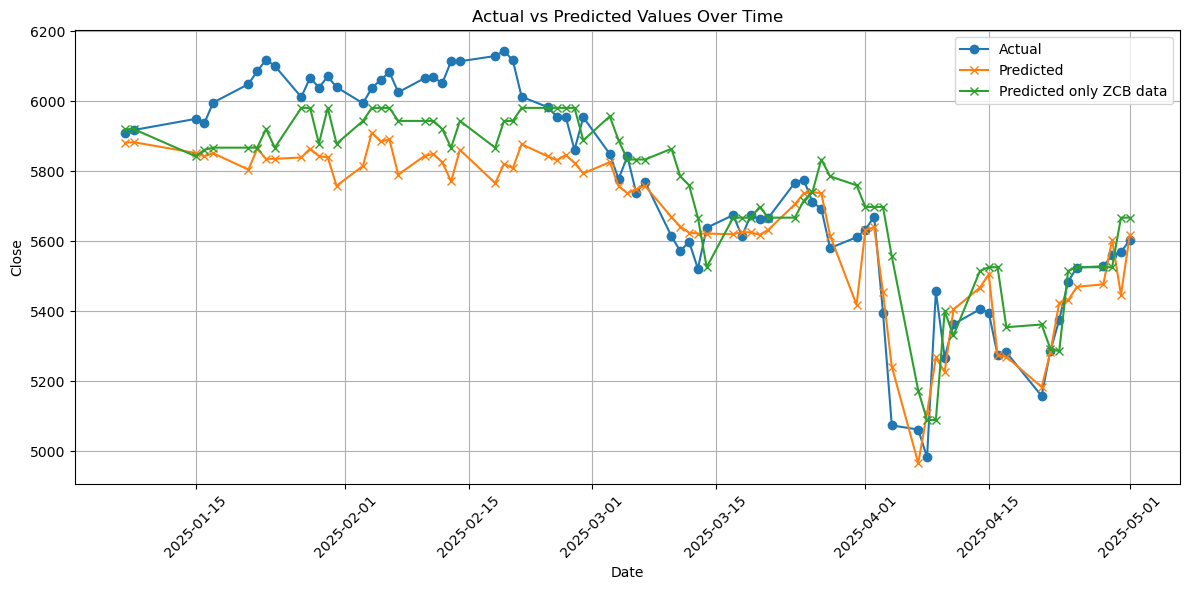

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data['Date'], y_pred, label='Predicted', marker='x')
plt.plot(test_data['Date'], y_pred_ZCB, label='Predicted only ZCB data', marker='x')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')  # or your target variable name
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # rotate date labels for readability
plt.tight_layout()       # adjust layout to prevent cutoff
plt.show()



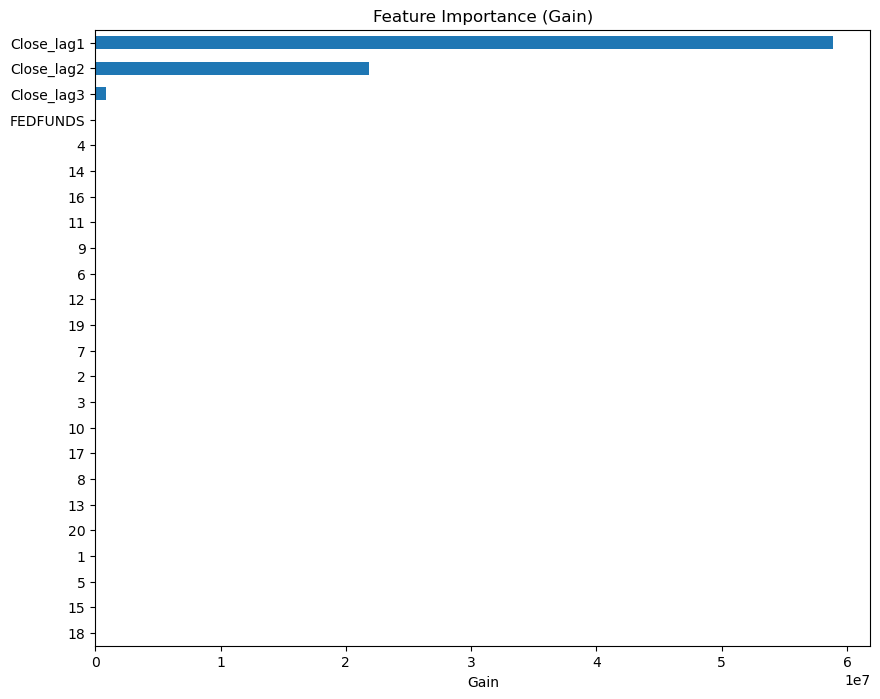

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance scores by 'gain'
importance = xgb_model.get_score(importance_type='gain')

# Convert to pandas Series for easier plotting and sorting
import pandas as pd
importance_series = pd.Series(importance).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importance_series.plot(kind='barh')
plt.xlabel('Gain')
plt.title('Feature Importance (Gain)')
plt.show()

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from sklearn.metrics import mean_absolute_error, make_scorer
# from scipy.stats import uniform, randint
# import time

# # Define your model
# xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', verbosity=0)

# # Define hyperparameter search space
# param_dist = {
#     'n_estimators': randint(100, 1000),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.3),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'gamma': uniform(0, 0.5),
#     'min_child_weight': randint(1, 10)
# }

# # Define scorer and cross-validation
# scorer = make_scorer(mean_absolute_error, greater_is_better=False)
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

# # Set up randomized search
# random_search = RandomizedSearchCV(
#     estimator=xgb_reg,
#     param_distributions=param_dist,
#     n_iter=50,  # Increase for more thorough search
#     scoring=scorer,
#     cv=cv,
#     random_state=42,
#     n_jobs=-1,
#     verbose=1
# )

# # Run optimization
# start = time.time()
# random_search.fit(X_train, Y_train)
# end = time.time()

# # Best model and evaluation
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)
# mae = mean_absolute_error(Y_test, y_pred)
# relative_mae = mae / abs(Y_test).mean()

# print(f"\nBest Parameters:\n{random_search.best_params_}")
# print(f"Mean Absolute Error: {mae:.4f}")
# print(f"Relative MAE: {relative_mae:.4f}")
# print(f"Time used for optimization and training: {(end - start) / 60:.2f} minutes")


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# Best hyperparameters from random search
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0,
    'colsample_bytree': 0.908897907718663,
    'gamma': 0.0993578407670862,
    'learning_rate': 0.01165663513708072,
    'max_depth': 5,
    'min_child_weight': 3,
    'subsample': 0.88453678109946
}

# Number of boosting rounds (best n_estimators)
num_boost_round = 692

# Train model
evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict
y_pred_ZCB_opt = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Evaluate
mae = mean_absolute_error(Y_test, y_pred_ZCB_opt)
mean_abs_actual = abs(Y_test).mean()
relative_mae = mae / mean_abs_actual

# Output
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 107.7219
Relative MAE: 0.0187
Time used by XGBoost: 796.9 ms


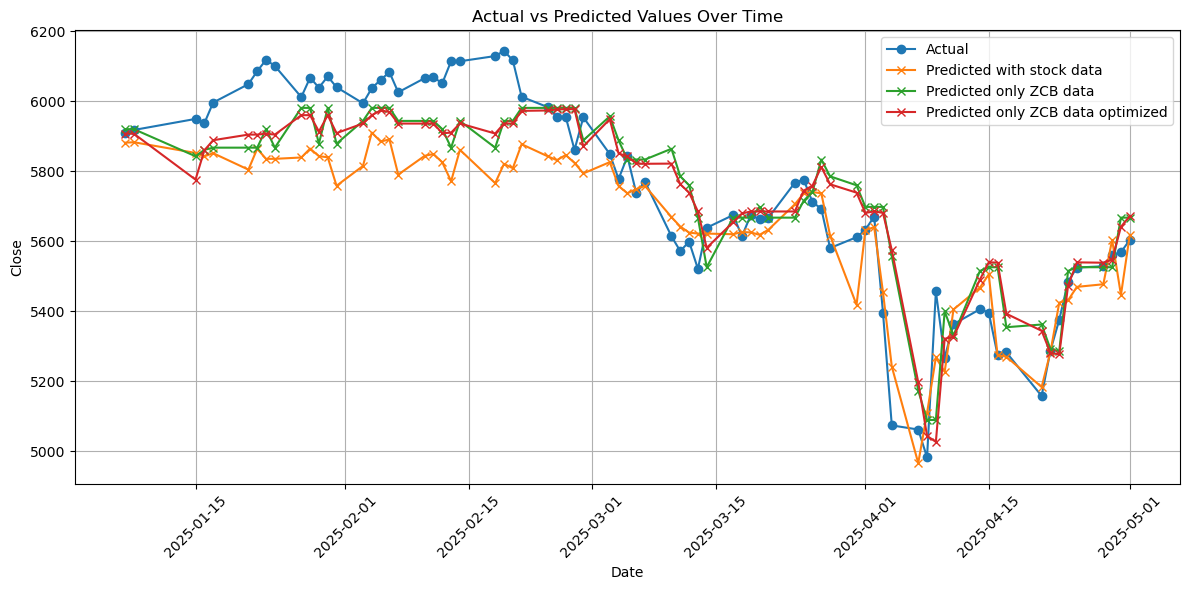

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data['Date'], y_pred, label='Predicted with stock data', marker='x')
plt.plot(test_data['Date'], y_pred_ZCB, label='Predicted only ZCB data', marker='x')
plt.plot(test_data['Date'], y_pred_ZCB_opt, label='Predicted only ZCB data optimized', marker='x')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Close')  # or your target variable name
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # rotate date labels for readability
plt.tight_layout()       # adjust layout to prevent cutoff
plt.show()


### Predicting with XGboost

#### Predicting with stock data

In [ ]:
# Example: use data before a date for training, after that date for testing

split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'Close'

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]

X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Assume data_w_SP is your full DataFrame with 'Date' as datetime

# Define split date for time split
split_date = pd.Timestamp('2025-01-01')

# Split data by date (time split)
train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'Close'

# Prepare features and target - no lag features, no date column
X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]

X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]

# Start timer
start = time.time()

# Drop rows with any missing values from train and test
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Prepare features and target again after dropping NA rows
X_train = train_data_clean.drop(columns=[target, 'Date'])
Y_train = train_data_clean[target]

X_test = test_data_clean.drop(columns=[target, 'Date'])
Y_test = test_data_clean[target]

# Now create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)


# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")



Mean Absolute Error: 79.0515
Relative MAE: 0.0137
Time used by XGBoost: 120.2 ms


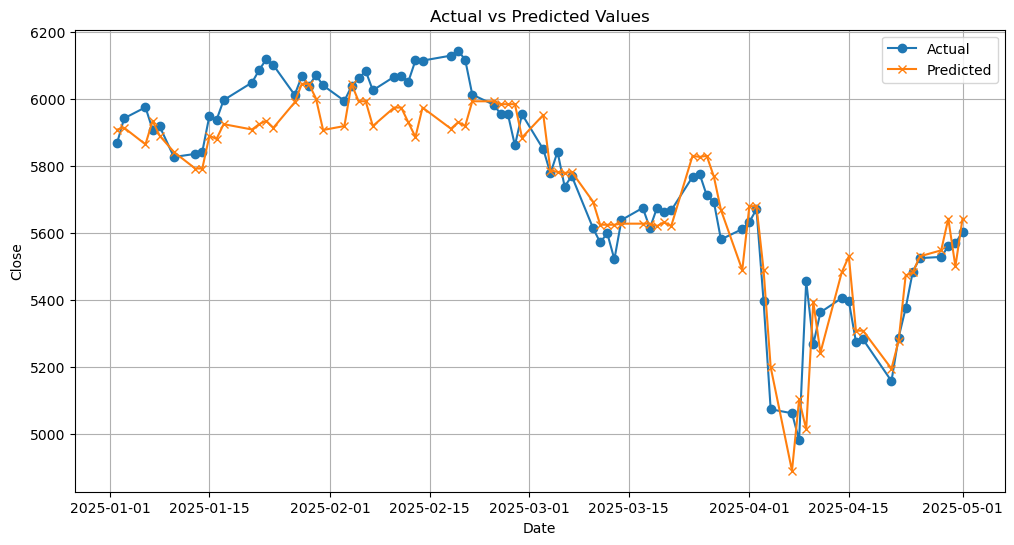

In [ ]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred, label='Predicted', marker='x')

plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting without stock data

In [ ]:
split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'Close'

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Define columns to drop including target, date, and Open/High/Low
cols_to_drop = [target, 'Date', 'Open', 'High', 'Low', 'Volume']

# Prepare features and target after dropping NA rows
X_train = train_data_clean.drop(columns=cols_to_drop)
Y_train = train_data_clean[target]

X_test = test_data_clean.drop(columns=cols_to_drop)
Y_test = test_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_ZCB)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")




Mean Absolute Error: 725.8321
Relative MAE: 0.1261
Time used by XGBoost: 106.5 ms


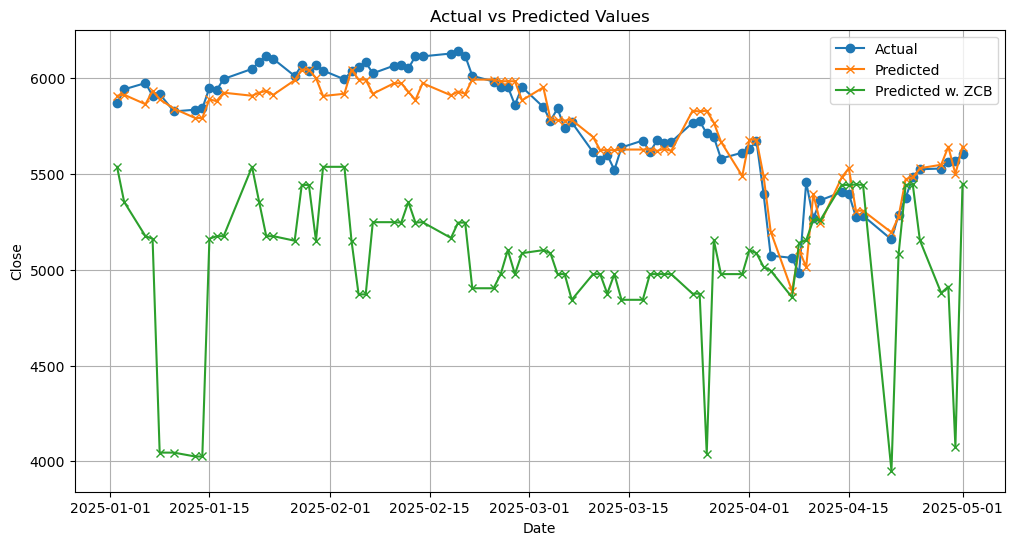

In [ ]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_ZCB = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred, label='Predicted', marker='x')
plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#### Predicting only stock data

In [ ]:
split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'Close'

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Select only Open, High, Low as features
feature_cols = ['Open', 'High', 'Low', 'Volume']

# Prepare features and target after drop,ping NA rows
X_train = train_data_clean[feature_cols]
Y_train = train_data_clean[target]

X_test = test_data_clean[feature_cols]
Y_test = test_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_stock = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_stock)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")




Mean Absolute Error: 71.9971
Relative MAE: 0.0125
Time used by XGBoost: 92.2 ms


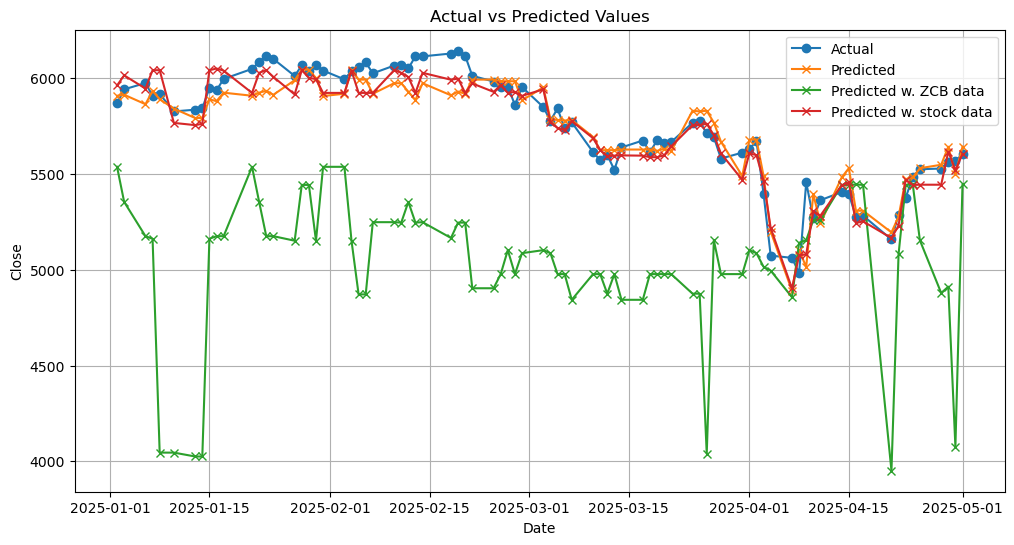

In [ ]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_stock = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred, label='Predicted', marker='x')
plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


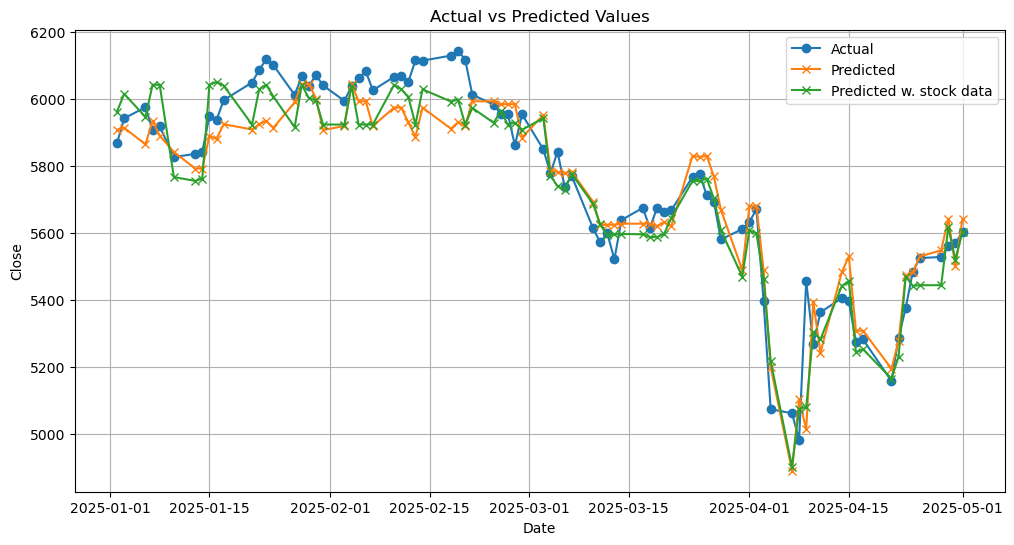

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred, label='Predicted', marker='x')
plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Data loading with latent space numbers - not done

In [ ]:
import pandas as pd

# Skip the first 9 rows
latent_space = pd.read_csv('../Final-Project-AppML/latent_space.csv')

#SP_500['Date'] = pd.to_datetime(SP_500['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

# Show the first 5 rows of the resulting dataframe
latent_space.head(5)

,latent_dim_1,latent_dim_2
0,-0.039638,-1.404462
1,-0.009008,1.542170
2,-0.018312,0.160683
3,-0.003717,-0.297078
4,-0.059667,-1.023101


In [ ]:
latent_space.shape

(9850, 2)